<a href="https://colab.research.google.com/github/Abrx1921/Data-Science-Portfolio/blob/main/Project_1_Transactions_AbrahamSS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Project 1: Transaction Success Prediction***

\Abraham Saenz Sigala
10/05/2025 :)

## Problem Definition


We are asked to predict whether or not a future customer will make a transaction based on their transcation data. Before looking at the data itself, we can assume our training data has a target variable that will more than likely display a 1/"Yes" (They will make a transaction) or a 0/"No"(They will NOT make a transaction).

With this setup, we can determine that we are dealing with a Supervised Learning problem. Since the target variable is categorical ("Yes"/"No"), we will specifically be creating a classification model.

## Data Collection/Sources


##### Data Overview

The data is available on AWS S3 at:
https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.big.csv

In [ ]:
# Importing Necessary Libaries for exploration, cleaning and manipulation.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Data URL (Location):

url = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.big.csv'


In [ ]:
# Load dataset

data = pd.read_csv(url)

In [ ]:
data

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100
0,0,train_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,train_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,train_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,train_3,0.0,4.6739,22.3915,15.6015,NaN,0.0464,NaN,NaN,...,NaN,11.1077,NaN,-12.6465,NaN,NaN,NaN,NaN,NaN,14.0618
4,4,train_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049995,1049995,train_1049995,1.0,11.3251,16.4148,20.5955,NaN,-6.3011,NaN,NaN,...,NaN,1.3921,NaN,-16.4925,NaN,NaN,NaN,NaN,NaN,14.4421
1049996,1049996,train_1049996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1049997,1049997,train_1049997,0.0,8.9941,13.4127,3.9567,NaN,3.5744,NaN,NaN,...,NaN,2.0836,NaN,-18.6168,NaN,NaN,NaN,NaN,NaN,14.0689
1049998,1049998,train_1049998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Understanding/Inspecting data

In [ ]:
data.sample(10, axis = 1)

,var_96,var_24,var_22,var_41,var_31,var_93,var_66,var_5,var_35,var_15
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,-0.3075,17.5209,-6.8709,NaN,NaN,8.2046,NaN,NaN,2.8817
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1049995,NaN,5.0281,10.7483,2.1288,NaN,NaN,15.3805,NaN,NaN,2.4579
1049996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1049997,NaN,7.2459,17.2669,9.3905,NaN,NaN,12.5216,NaN,NaN,2.5439
1049998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050000 entries, 0 to 1049999
Columns: 104 entries, Unnamed: 0 to var_100
dtypes: float64(102), int64(1), object(1)
memory usage: 833.1+ MB


In [ ]:
data.iloc[:,:10].info() #verbose = True - all rows!!!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050000 entries, 0 to 1049999
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  1050000 non-null  int64  
 1   ID_code     1050000 non-null  object 
 2   target      180000 non-null   float64
 3   var_0       180000 non-null   float64
 4   var_1       180000 non-null   float64
 5   var_2       180000 non-null   float64
 6   var_3       0 non-null        float64
 7   var_4       180000 non-null   float64
 8   var_5       0 non-null        float64
 9   var_6       0 non-null        float64
dtypes: float64(8), int64(1), object(1)
memory usage: 80.1+ MB


In [ ]:
data['var_3'].isnull().sum()

np.int64(1050000)

In [ ]:
data.isna().sum()

,0
Unnamed: 0,0
ID_code,0
target,870000
var_0,870000
var_1,870000
...,...
var_96,1050000
var_97,1050000
var_98,1050000
var_99,1050000


From what I can see there is a lot of null values. There are even entire columns where the entire column is entirely NaN values. We will handle this columns during the data cleaning phase.

In [ ]:
data.shape

(1050000, 104)

In [ ]:
data.size

109200000

In [ ]:
data[['Unnamed: 0', 'ID_code']].value_counts() # Ensuring these two id columns share the same ids/numbers

,,count
Unnamed: 0,ID_code,
1049983,train_1049983,1
1049982,train_1049982,1
1049981,train_1049981,1
1049980,train_1049980,1
1049979,train_1049979,1
...,...,...
4,train_4,1
3,train_3,1
2,train_2,1


In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1050000.0,524999.500000,303109.035663,0.0000,262499.750000,524999.50000,787499.250000,1.049999e+06
target,180000.0,0.100222,0.300297,0.0000,0.000000,0.00000,0.000000,1.000000e+00
var_0,180000.0,7.440715,3.021636,-2.6917,5.160325,7.35095,9.511125,1.671650e+01
var_1,180000.0,15.870166,3.010492,6.2993,13.830400,15.93460,18.061425,2.607910e+01
var_2,180000.0,12.735619,4.185923,-1.0185,9.664675,12.67070,15.837300,2.699760e+01
...,...,...,...,...,...,...,...,...
var_96,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
var_97,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
var_98,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
var_99,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning


#### BackUp Copy

In [ ]:
df = data.copy()
df.head(2)

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100
0,0,train_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,train_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Deleting Columns where all values are null
all_null_mask = [df.isna().sum() == 1050000]

In [ ]:
pd.Series(all_null_mask).sum().sum() # we will be dropping 51 values that are fully null

np.int64(51)

In [ ]:
df.shape

(1050000, 104)

In [ ]:
df = df.dropna(axis = 1, how = 'all')


In [ ]:
df.shape

(1050000, 53)

Like expected we are now dealing with 50 less colums. A huge reduction in the amount of total columns.

In [ ]:
df.isna().sum().value_counts()

,count
870000,51
0,2


In [ ]:
df.sample(10)

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_4,var_7,var_8,var_14,...,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_92,var_94,var_100
128627,128627,train_128627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
932609,932609,train_932609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
488891,488891,train_488891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
893985,893985,train_893985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267984,267984,train_267984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
347726,347726,train_347726,0.0,7.3026,16.7376,4.0110,1.3851,3.8122,6.9825,13.5543,...,11.3180,3.9935,7.7888,9.2820,9.5625,2.0752,0.4556,-19.2609,-9.6260,14.4623
331880,331880,train_331880,0.0,9.5015,16.5912,13.0004,-3.3437,0.0801,7.1873,9.0835,...,10.1094,3.9490,5.9112,15.2054,11.8554,3.7631,-1.2099,-3.1111,-5.2463,14.1953
175671,175671,train_175671,0.0,10.6368,17.2921,13.6001,6.3927,-2.9790,6.5987,5.6421,...,11.3616,4.0877,4.9176,29.7333,11.5931,1.6233,-3.6120,-7.3613,-3.3030,14.2451
258595,258595,train_258595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
786020,786020,train_786020,0.0,5.7190,15.8335,11.3163,-3.4095,7.2171,6.9760,2.1146,...,11.4193,3.6890,7.3838,29.3476,9.0215,0.7571,2.6391,-7.3848,2.4283,14.2366


In [ ]:
# Drop other columns that are just identifiers
df = df.drop(labels = ['Unnamed: 0', 'ID_code'], axis = 1)

In [ ]:
df.shape

(1050000, 51)

In [ ]:
# Next I want to drop all rows that are null for our target variable.
df['target'].value_counts( dropna = False )

,count
target,
NaN,870000
0.0,161960
1.0,18040


Here we can clearly see that our dataset is unbalanced due to not having an even amount of 0's and 1's. We may have to handle this later depending on our models results!

In [ ]:
# We should be left with 180000 rows after dropping all NaN values
161960 + 18040

180000

In [ ]:
df = df.dropna(subset = ['target'])

In [ ]:
df.shape

(180000, 51)

After dropping all values where our 'target' variable was a null. We are left only with 180000 rows to work with. We also saw earlier that our dataset was unbalanced. We may or may not tackkle this issue later.

In [ ]:
df.head(5)

,target,var_0,var_1,var_2,var_4,var_7,var_8,var_14,var_15,var_17,...,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_92,var_94,var_100
3,0.0,4.6739,22.3915,15.6015,0.0464,-1.9254,6.4760,21.6435,2.8817,11.6975,...,11.8011,3.9677,9.5382,-8.4394,5.5043,2.2732,1.6362,11.1077,-12.6465,14.0618
5,0.0,14.6962,18.3383,17.4788,-9.1355,-6.4882,6.0821,11.7476,2.2225,7.2218,...,11.8294,3.8887,8.8591,6.1482,8.5833,2.8432,1.8434,-2.0111,-3.6166,14.4520
11,0.0,4.4949,14.4142,13.2219,4.9140,4.0501,5.8144,18.7136,3.4990,4.2892,...,11.7464,4.0017,5.8179,10.4951,12.4494,2.8009,0.3394,13.9424,-15.5776,14.1222
15,0.0,4.9657,16.2867,17.9579,0.6017,-5.4904,6.6670,8.1019,2.8910,8.2374,...,11.5481,3.9809,8.2247,21.2257,6.9931,3.3939,-2.3905,3.7943,5.6184,14.0619
19,0.0,9.4287,18.7822,10.7630,-0.7532,8.8477,6.8045,19.0069,3.2771,12.6446,...,10.8981,4.1808,9.4220,1.8563,10.5738,1.2409,-1.3888,-5.6677,-1.8961,14.0275


In [ ]:
df.isna().sum().sum()

np.int64(0)

We have completely got rid of any null values from our dataset which is great when we are dealing with a supervised learning problem. Also, from what I can tell, there was no reason to impute because we got rid of columns where all the values were missing and all the rows that were also null for our target variable nuked our data. If this wasn't the case, then we would have had to do some type of imputation.

## Exploratory Data Analysis


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180000 entries, 3 to 1049999
Data columns (total 51 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   target   180000 non-null  float64
 1   var_0    180000 non-null  float64
 2   var_1    180000 non-null  float64
 3   var_2    180000 non-null  float64
 4   var_4    180000 non-null  float64
 5   var_7    180000 non-null  float64
 6   var_8    180000 non-null  float64
 7   var_14   180000 non-null  float64
 8   var_15   180000 non-null  float64
 9   var_17   180000 non-null  float64
 10  var_20   180000 non-null  float64
 11  var_21   180000 non-null  float64
 12  var_22   180000 non-null  float64
 13  var_24   180000 non-null  float64
 14  var_26   180000 non-null  float64
 15  var_27   180000 non-null  float64
 16  var_28   180000 non-null  float64
 17  var_29   180000 non-null  float64
 18  var_36   180000 non-null  float64
 19  var_37   180000 non-null  float64
 20  var_38   180000 non-null  floa

In [ ]:
df.describe()

,target,var_0,var_1,var_2,var_4,var_7,var_8,var_14,var_15,var_17,...,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_92,var_94,var_100
count,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.00000,...,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000
mean,0.100222,7.440715,15.870166,12.735619,-0.668334,1.190419,6.813431,11.946357,2.963064,8.52808,...,11.434945,3.990847,7.566953,12.756574,10.342814,1.927078,-0.746871,-3.294620,-6.727860,14.224538
std,0.300297,3.021636,3.010492,4.185923,5.968300,5.169343,0.375564,7.364523,0.369891,4.64170,...,0.541385,0.198989,1.235043,9.320939,2.520602,1.476777,1.862151,7.418545,8.278554,0.171058
min,0.000000,-2.691700,6.299300,-1.018500,-22.748700,-15.194000,5.359300,-19.544300,1.851200,-6.01110,...,9.816900,3.320500,3.970500,-18.489700,0.427400,-3.814500,-7.280600,-29.984000,-35.211700,13.729000
25%,0.000000,5.160325,13.830400,9.664675,-4.997500,-2.571400,6.544100,6.756875,2.698400,5.06575,...,11.032400,3.853700,6.618800,5.661300,8.646700,0.890000,-2.105300,-8.757925,-12.835875,14.098900
50%,0.000000,7.350950,15.934600,12.670700,-0.560300,1.194600,6.806800,11.925300,2.959900,8.59920,...,11.435500,3.996000,7.628500,12.520300,10.395800,1.899700,-0.772000,-3.170950,-6.615100,14.226800
75%,0.000000,9.511125,18.061425,15.837300,3.632525,5.090450,7.070900,17.039600,3.241425,12.27330,...,11.845000,4.131625,8.583800,19.461725,12.116300,2.947225,0.526925,2.043350,-0.885250,14.361800
max,1.000000,16.716500,26.079100,26.997600,18.855400,18.471400,8.309100,39.396800,4.220400,22.33150,...,13.287800,4.752800,11.150600,44.363400,20.437300,8.402400,4.993900,21.236400,18.105600,14.743000


In [ ]:
# Creating a correlation matrix inorder to see if we should drop any features that are not independent
correlations = df.corr(numeric_only = True)

In [ ]:
# Drop target, we don't care about correlation between features and target
correlations = correlations.drop(index = 'target', columns = 'target')

In [ ]:
correlations

,var_0,var_1,var_2,var_4,var_7,var_8,var_14,var_15,var_17,var_20,...,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_92,var_94,var_100
var_0,1.000000,-0.000892,-0.000225,-0.000269,-0.001320,0.002949,0.002901,-0.007758,-0.002799,-0.001353,...,-0.004960,-0.005451,-0.000716,0.004577,-0.004664,-0.001088,0.000236,0.001668,0.001837,0.001475
var_1,-0.000892,1.000000,0.006064,-0.000821,0.000783,-0.007127,-0.006180,-0.002585,-0.001663,0.001590,...,0.004265,0.002411,0.001484,-0.003859,-0.000485,0.003141,-0.006188,0.000071,-0.003682,0.003964
var_2,-0.000225,0.006064,1.000000,-0.003427,-0.000108,-0.001809,-0.002786,-0.001177,0.006360,0.004796,...,0.004890,0.002240,0.001980,-0.001161,0.003921,0.002087,-0.004422,-0.003418,-0.001565,0.002418
var_4,-0.000269,-0.000821,-0.003427,1.000000,-0.002750,0.003347,0.001377,-0.004732,-0.001814,-0.000539,...,0.000657,-0.005267,-0.004266,-0.004179,-0.004211,-0.002330,0.000254,0.001090,-0.000468,-0.002807
var_7,-0.001320,0.000783,-0.000108,-0.002750,1.000000,-0.003199,-0.003588,0.002329,0.004282,-0.001971,...,-0.000412,0.003262,0.002574,-0.001824,0.001186,0.002811,0.001306,0.000236,-0.000568,0.004575
var_8,0.002949,-0.007127,-0.001809,0.003347,-0.003199,1.000000,0.003472,-0.003858,-0.002727,-0.003417,...,-0.008394,-0.004254,-0.002446,0.001117,-0.003713,-0.003929,0.003837,0.003422,0.003204,0.000821
var_14,0.002901,-0.006180,-0.002786,0.001377,-0.003588,0.003472,1.000000,-0.007115,-0.004249,-0.001595,...,-0.002214,-0.002179,-0.003054,-0.000160,-0.000504,-0.004046,0.003136,0.005715,0.001501,-0.000106
var_15,-0.007758,-0.002585,-0.001177,-0.004732,0.002329,-0.003858,-0.007115,1.000000,0.002467,0.003584,...,0.000581,0.006633,0.004569,-0.001573,0.003251,0.003066,-0.001541,-0.003719,-0.002825,0.004247
var_17,-0.002799,-0.001663,0.006360,-0.001814,0.004282,-0.002727,-0.004249,0.002467,1.000000,0.001476,...,0.005578,0.001237,0.000210,-0.002714,0.004149,-0.002182,-0.002642,-0.001968,-0.004100,-0.000822
var_20,-0.001353,0.001590,0.004796,-0.000539,-0.001971,-0.003417,-0.001595,0.003584,0.001476,1.000000,...,-0.001476,0.003107,0.001610,0.001186,0.004265,0.001449,-0.004506,-0.003241,-0.000988,0.001734


In [ ]:
# Look for absolute correlation for future sorting and filtering
abs_corr = correlations.abs()
abs_corr

,var_0,var_1,var_2,var_4,var_7,var_8,var_14,var_15,var_17,var_20,...,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_92,var_94,var_100
var_0,1.000000,0.000892,0.000225,0.000269,0.001320,0.002949,0.002901,0.007758,0.002799,0.001353,...,0.004960,0.005451,0.000716,0.004577,0.004664,0.001088,0.000236,0.001668,0.001837,0.001475
var_1,0.000892,1.000000,0.006064,0.000821,0.000783,0.007127,0.006180,0.002585,0.001663,0.001590,...,0.004265,0.002411,0.001484,0.003859,0.000485,0.003141,0.006188,0.000071,0.003682,0.003964
var_2,0.000225,0.006064,1.000000,0.003427,0.000108,0.001809,0.002786,0.001177,0.006360,0.004796,...,0.004890,0.002240,0.001980,0.001161,0.003921,0.002087,0.004422,0.003418,0.001565,0.002418
var_4,0.000269,0.000821,0.003427,1.000000,0.002750,0.003347,0.001377,0.004732,0.001814,0.000539,...,0.000657,0.005267,0.004266,0.004179,0.004211,0.002330,0.000254,0.001090,0.000468,0.002807
var_7,0.001320,0.000783,0.000108,0.002750,1.000000,0.003199,0.003588,0.002329,0.004282,0.001971,...,0.000412,0.003262,0.002574,0.001824,0.001186,0.002811,0.001306,0.000236,0.000568,0.004575
var_8,0.002949,0.007127,0.001809,0.003347,0.003199,1.000000,0.003472,0.003858,0.002727,0.003417,...,0.008394,0.004254,0.002446,0.001117,0.003713,0.003929,0.003837,0.003422,0.003204,0.000821
var_14,0.002901,0.006180,0.002786,0.001377,0.003588,0.003472,1.000000,0.007115,0.004249,0.001595,...,0.002214,0.002179,0.003054,0.000160,0.000504,0.004046,0.003136,0.005715,0.001501,0.000106
var_15,0.007758,0.002585,0.001177,0.004732,0.002329,0.003858,0.007115,1.000000,0.002467,0.003584,...,0.000581,0.006633,0.004569,0.001573,0.003251,0.003066,0.001541,0.003719,0.002825,0.004247
var_17,0.002799,0.001663,0.006360,0.001814,0.004282,0.002727,0.004249,0.002467,1.000000,0.001476,...,0.005578,0.001237,0.000210,0.002714,0.004149,0.002182,0.002642,0.001968,0.004100,0.000822
var_20,0.001353,0.001590,0.004796,0.000539,0.001971,0.003417,0.001595,0.003584,0.001476,1.000000,...,0.001476,0.003107,0.001610,0.001186,0.004265,0.001449,0.004506,0.003241,0.000988,0.001734


In [ ]:
# Unstacking them makes them easier to sort
unstack_corr = abs_corr.unstack()
unstack_corr

var_0    var_0      1.000000
         var_1      0.000892
         var_2      0.000225
         var_4      0.000269
         var_7      0.001320
                      ...   
var_100  var_88     0.001439
         var_89     0.000851
         var_92     0.001871
         var_94     0.002841
         var_100    1.000000
Length: 2500, dtype: float64

In [ ]:
# Filter out correlations that are self correlated (1 to 1)
self_corr = unstack_corr[unstack_corr < 1]
self_corr # - 50 rows which is perfect since we have 50 columns for correlation (pre-unstack)

var_0    var_1     0.000892
         var_2     0.000225
         var_4     0.000269
         var_7     0.001320
         var_8     0.002949
                     ...   
var_100  var_87    0.002963
         var_88    0.001439
         var_89    0.000851
         var_92    0.001871
         var_94    0.002841
Length: 2450, dtype: float64

In [ ]:
# Filter out based on a specific threshold and the sort the values
high_corr = self_corr[self_corr > .3].sort_values(ascending = False)
high_corr


,,0


Setting a threshold as low as .3 we see that we haver no features that are highly correlated. This means that we are working with a dataset that has independent features. This is great, we can now move on to the processing stage.

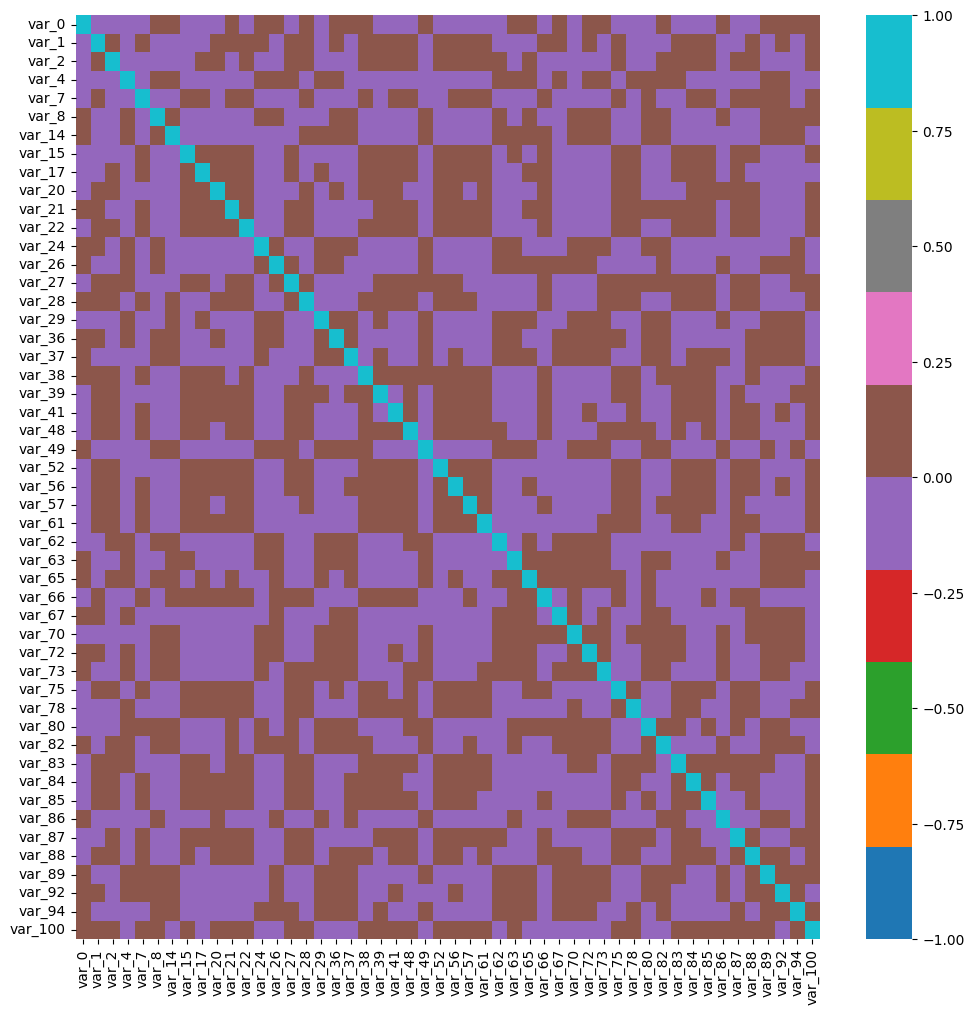

In [ ]:
# Just for fun
plt.figure(figsize=(12,12))
sns.heatmap(correlations, vmin=-1, cmap = 'tab10')
plt.show()

In [ ]:
df.shape

(180000, 51)

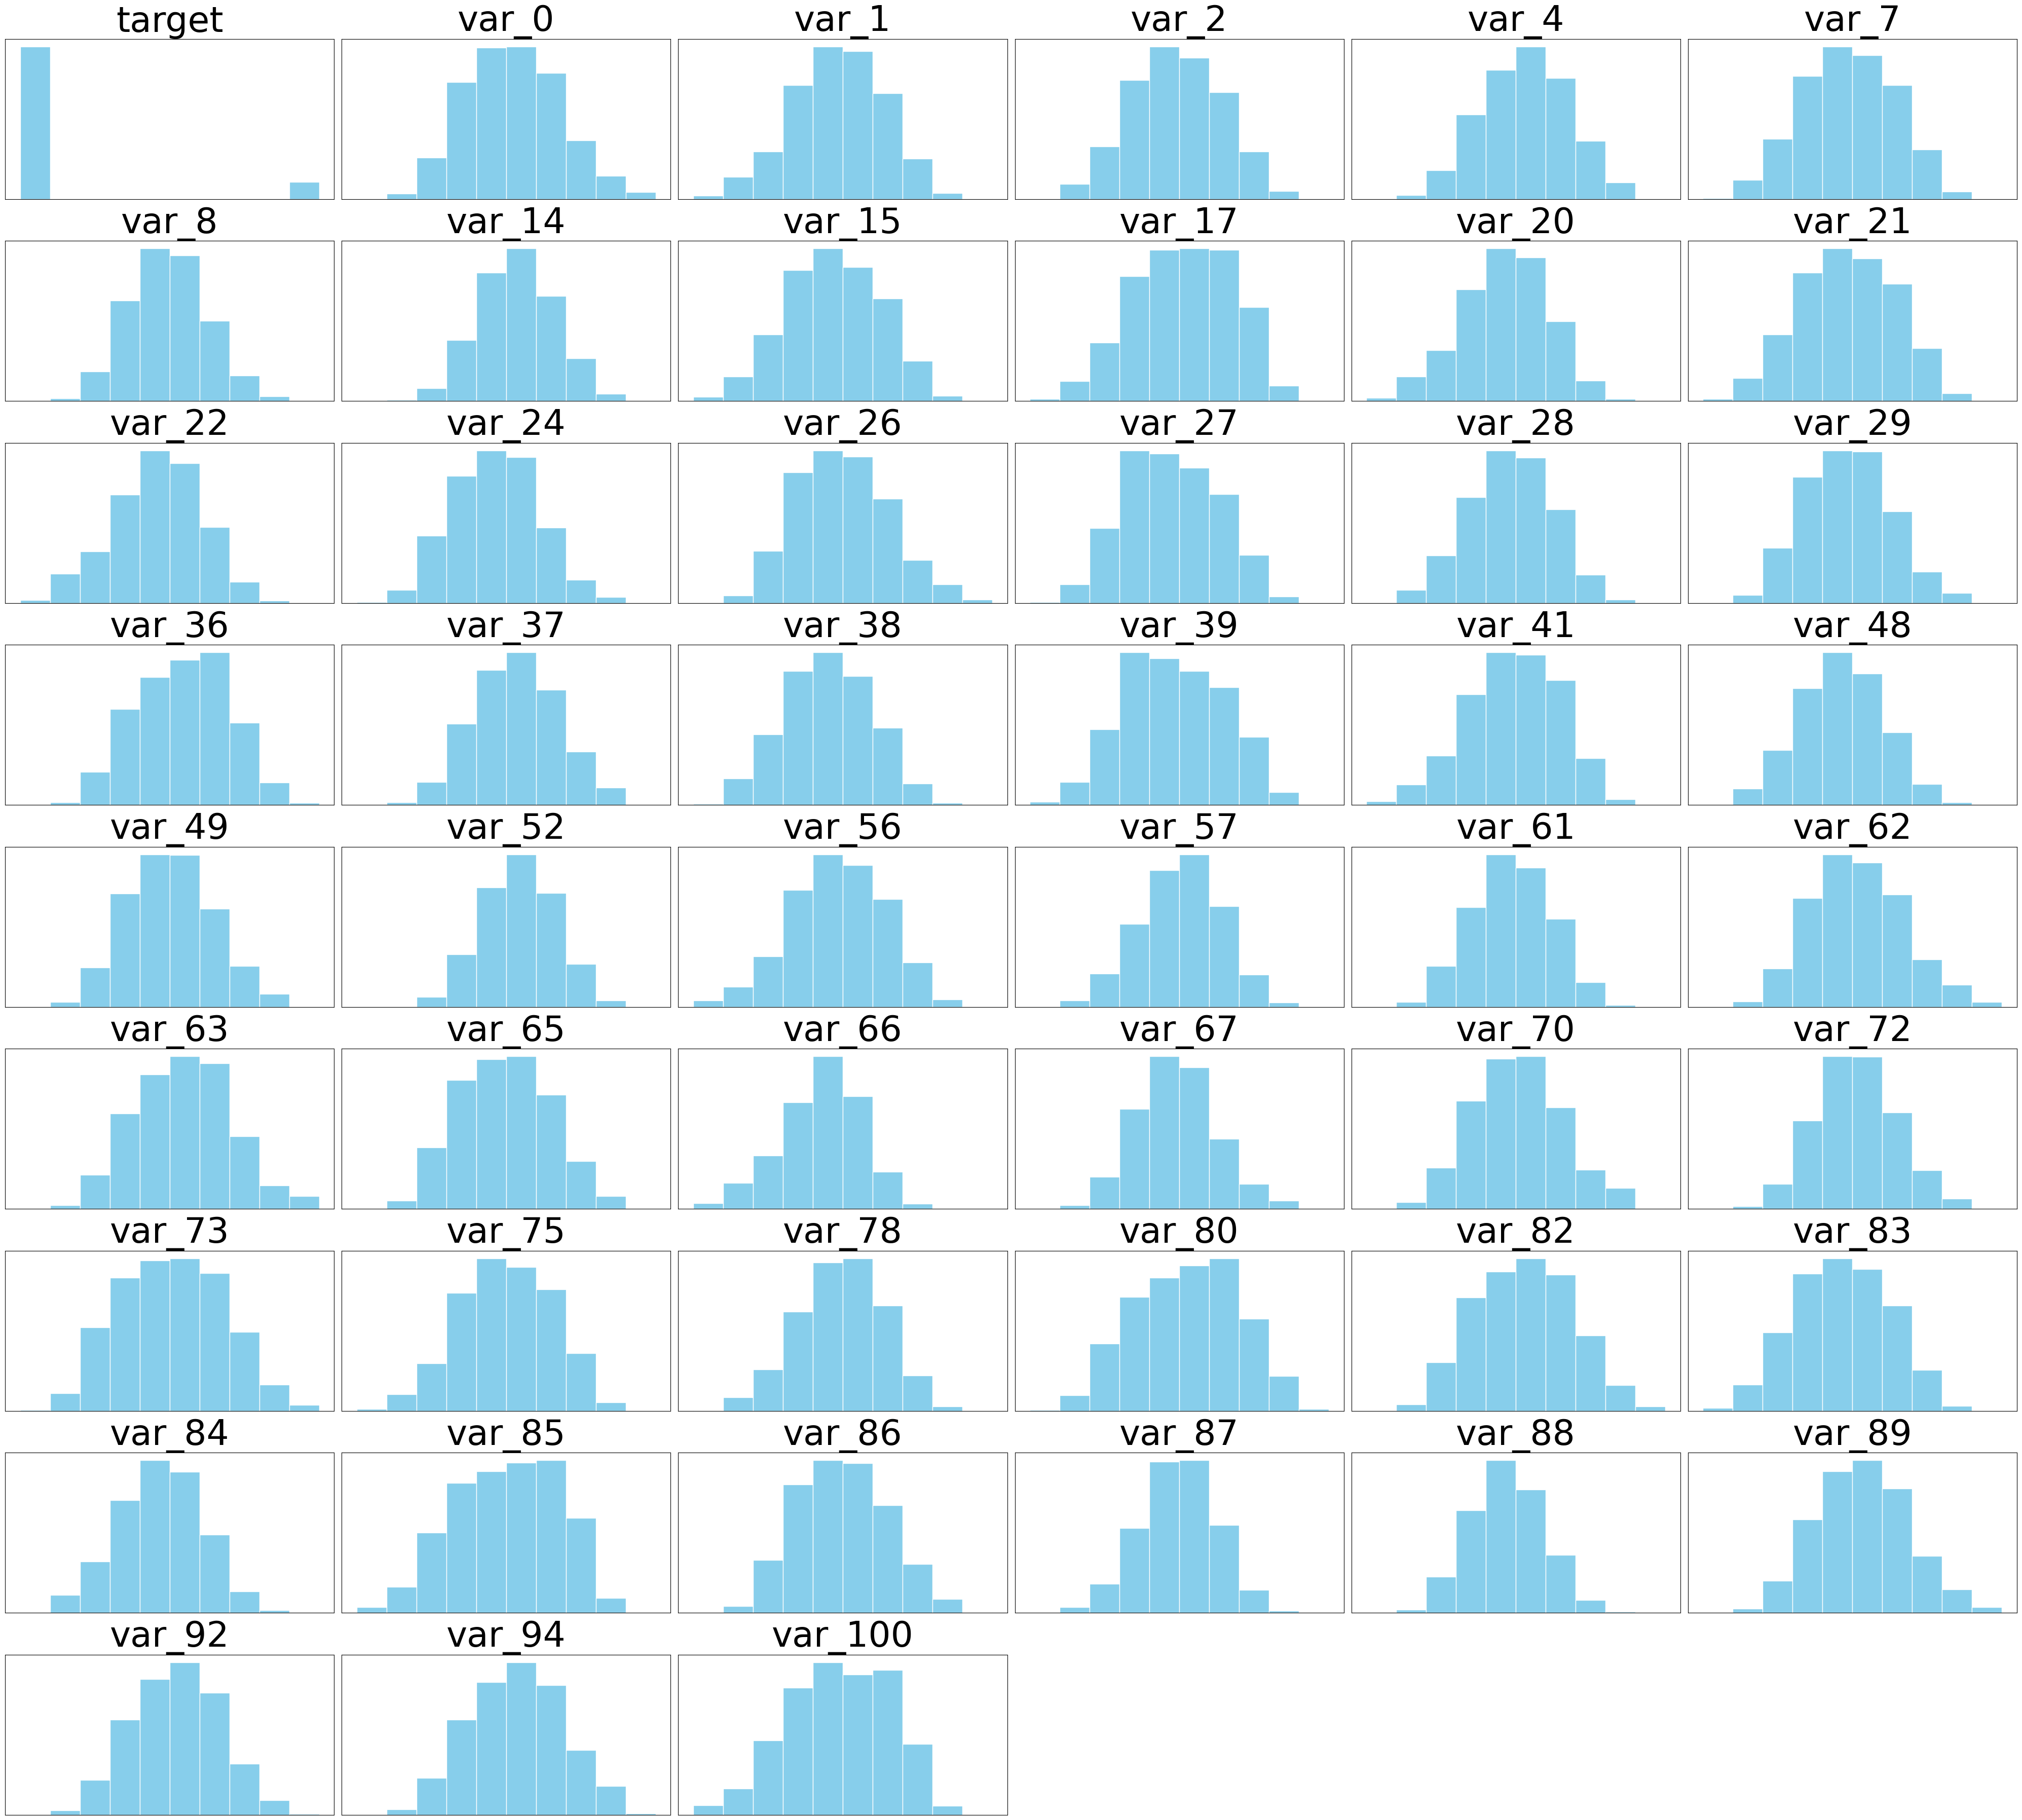

In [ ]:
# Lets take a look to see if our features have a normal distribution
axes = df.hist(figsize=(40, 40), layout=(10,6), bins=10, color='skyblue', edgecolor='white')

# Remove axis ticks and labels for all subplots
for ax in axes.flatten():
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(ax.get_title(), fontsize=50, pad=5)

plt.tight_layout()
plt.show()

## Processing



In [ ]:
# Import necessary libraries for model creation

from sklearn import datasets, metrics, model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


We begin by separating our df into thier respective parts (target and features).

In [ ]:
target = df['target']
target


,target
3,0.0
5,0.0
11,0.0
15,0.0
19,0.0
...,...
1049990,0.0
1049993,0.0
1049995,1.0
1049997,0.0


In [ ]:
features = df.drop(columns = 'target')
features.sample(5)


,var_0,var_1,var_2,var_4,var_7,var_8,var_14,var_15,var_17,var_20,...,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_92,var_94,var_100
316580,8.0139,14.9060,14.8130,-8.1704,3.3013,6.3400,6.5976,2.5859,5.4287,4.8064,...,11.0873,3.8248,5.5967,7.0744,13.5248,-0.0272,2.1863,0.1882,-4.4547,14.5405
527532,9.9292,19.1609,16.1402,1.1964,-6.5863,6.5511,21.7026,3.3783,12.0040,12.9367,...,10.6204,3.9907,8.6784,1.5948,10.5666,3.3527,1.1376,1.4061,2.5344,14.4529
435117,4.0842,12.8840,9.6570,3.5013,8.5226,6.7579,10.8426,3.5284,-1.1437,9.1545,...,12.1331,4.1047,6.5392,7.5133,9.6094,1.2240,0.4697,-18.6538,12.7919,14.1723
495875,7.2031,13.2336,19.5701,-12.0981,-0.3501,6.3004,17.4626,3.2234,1.0438,1.4110,...,11.8474,3.9619,6.4679,18.8921,13.0756,0.6449,-1.2914,2.0838,-13.1624,14.2390
551454,10.5922,11.7978,9.5623,-6.7776,-3.8704,7.4249,17.3478,3.3151,11.0093,0.2536,...,11.1983,3.7390,5.9535,-0.4148,13.6029,0.8836,-0.8477,-1.1739,-1.6591,14.0818


In [ ]:
# Split our data into testing and train sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = .2, random_state = 42)


In [ ]:
X_train.shape

(144000, 50)

In [ ]:
X_test.shape

(36000, 50)

We split our data with a test size of 20% (36000) and a training size of 80% (144000).

In [ ]:
# Load the GaussianNB Model
gnb = GaussianNB()


In [ ]:
# Fit the model on training data (studying for the exam)
gnb.fit(X_train, y_train)


GaussianNB()

In [ ]:
# Model Prediction (look at how well the model performed)
y_pred = gnb.predict(X_test)
y_pred


array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
# How many from our 36000 predictions did we actually get wrong
(y_test != y_pred).sum()

np.int64(3207)

In [ ]:
# What is the percent of the ones we actually got right.
((1-(y_test - y_pred).abs()).mean() *  100).round(2)

np.float64(91.09)

In [ ]:
# % if the time we were right
100 - ( ( 3207 / 36000 ) * 100 )

91.09166666666667

In [ ]:
# % if the time we were wrong
( ( 3207 / 36000 ) * 100 )

8.908333333333333

Our prediction model got 8.91% of the answers wrong. So 91.09% were right. Based on our math, 3207 of 36000 is equal to those percents respectively.

##### Cross Validation

Now that we got our model up and running, I am going to perform cross validation so our test and training sets see different data and we can better gauge how well it will perform in the real world.

In [ ]:
# np.zeros?

In [ ]:
n = 100
results = np.zeros(n)

for t in range(n):
  # Train/Test Split
  X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = .20)

  # Model
  gnb = GaussianNB()

  # Fit the model
  gnb.fit(X_train, y_train)

  # Model Predictions
  y_pred = gnb.predict(X_test)

  # Models Performance
  results[t] = (1-(y_test - y_pred).abs()).mean().round(4)
  # results[t] = accuracy_score(y_test, y_pred)

In [ ]:
results.mean()

np.float64(0.91133)

In [ ]:
results[0:11] #Visualizing how some of the different predictions look

array([0.9116, 0.9117, 0.9132, 0.9123, 0.9099, 0.9118, 0.9101, 0.9142,
       0.9114, 0.9118, 0.9111])

In [ ]:
((accuracy_score(y_test, y_pred)) * 100)

91.08055555555555

I used accuracy score this time around to see how our % would vary using it. There was a small difference in the thousands place. Nothing to be concerened about!

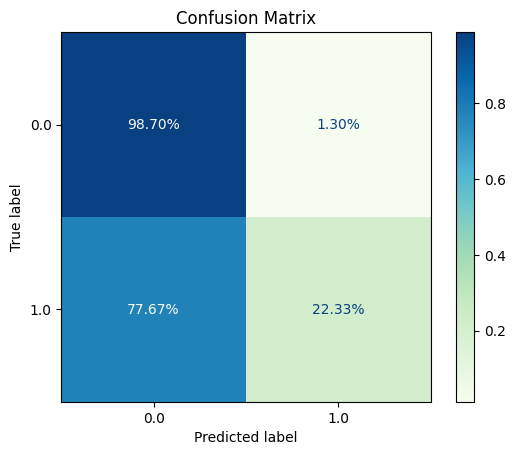

In [ ]:
# Confusion Matrix Plot

metrics.ConfusionMatrixDisplay.from_estimator(
    gnb,
    X_test,
    y_test,
    normalize = 'true',
    values_format = '.2%',
    cmap = 'GnBu',
)
plt.grid(False)
plt.title('Confusion Matrix')
plt.show()

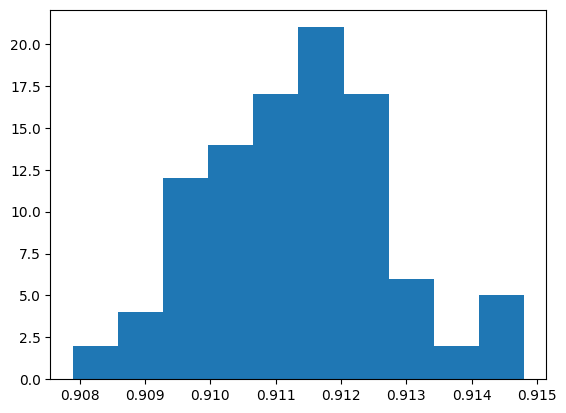

In [ ]:
# Visualizing the distribution of our 100 runs via a Histogram.
plt.hist(results, bins = 10)
plt.show()

We can see that our confusion matrix indicates the model performs well at identifying true negatives. However, its ability to correctly identify true positives is quite poor, with a rate of only 23.33%. When examining false negatives, we observe that over 75% of the time, the model predicts a 0 when the actual value is 1.

This imbalance likely stems from the dataset being unbalanced, where the majority class (0) heavily outweighs the minority class (1). While there are several balancing techniques available—such as SMOTE, undersampling, or class weighting—for now, I’ll take a simpler approach by randomly sampling from the majority class to match the size of the minority class.

It’s also important to note that this confusion matrix represents only one run of the model and does not reflect the aggregate performance across the 100 variations used during cross-validation.

##### Balancing the dataset

In [ ]:
# Veryfing Dataset Unbalance
df['target'].value_counts()

,count
target,
0.0,161960
1.0,18040


In [ ]:
# Balancing the dataset

zeros_balanced = df[df['target'] == 0].sample(18040) # Getting a random sample of 18040 (= to our 1's)

ones_balanced = df[df['target'] == 1] # Getting all of our ones

the_balanced_data = pd.concat([zeros_balanced, ones_balanced]) # Combining the two dataframes


In [ ]:
the_balanced_data


,target,var_0,var_1,var_2,var_4,var_7,var_8,var_14,var_15,var_17,...,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_92,var_94,var_100
900127,0.0,9.9945,17.3216,14.8831,1.2963,-2.8468,7.1205,11.7888,3.5497,16.8276,...,11.6489,4.0541,6.7898,10.5873,11.3368,3.5003,-4.0991,-7.3686,-4.4469,14.2162
51856,0.0,2.3500,16.3235,6.9225,-6.8295,7.0664,6.6384,14.7928,3.1624,11.7553,...,11.3575,3.9458,8.0232,19.0467,6.8249,3.5814,1.1350,2.2809,-3.1936,14.2392
84280,0.0,12.3084,18.2829,10.2912,2.9614,1.4239,7.2387,18.9853,3.5104,13.2556,...,10.8632,3.9105,6.5593,15.2368,11.1604,1.1021,-0.0100,-7.4502,-7.8088,14.2572
404573,0.0,12.7775,22.5759,13.4505,-5.7853,3.7932,7.0820,16.4466,2.0720,9.9551,...,12.2714,4.0366,8.9374,7.8161,12.6285,2.0949,-3.8326,-9.5693,-11.7173,14.1270
980711,0.0,5.2541,17.3965,19.1860,1.8308,4.3755,7.0519,8.9555,3.5005,7.9455,...,11.4829,3.8411,8.0033,15.9456,10.5439,4.8728,-0.7495,-2.4645,-1.8149,14.1735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049783,1.0,3.1286,15.0751,21.3962,11.3161,-10.0493,6.3525,25.4931,2.6605,7.2691,...,10.9172,4.1120,4.6540,9.1151,7.8918,2.5714,1.0304,5.2623,-0.6030,14.1993
1049818,1.0,15.2934,17.5721,5.8949,-4.0233,5.8840,7.3892,11.3932,2.7062,6.9666,...,11.1665,3.9652,7.4879,-7.9060,10.7256,0.8941,-3.5967,6.3976,0.5778,14.5067
1049978,1.0,7.4751,17.0314,5.0834,-1.5220,-2.4913,6.7953,10.7764,2.9049,2.6145,...,11.6605,3.6716,8.5965,19.2145,8.2747,4.0945,-3.0127,2.9477,-2.3696,14.4122
1049983,1.0,5.2746,14.4095,17.7709,-2.9855,-0.8515,6.5097,11.5599,2.9677,0.0507,...,11.8870,3.7776,6.9876,3.3482,9.7469,-0.3425,-2.5684,14.5286,-5.4146,14.4388


In [ ]:
the_balanced_data.shape

(36080, 51)

Now that our dataset is balanced we can do the proccessing phase again and see if we get any improvement in our model as well as being able to identify true positives more effectively. We are doing this once and then again checking seeing the actual results if we were to do a real world test (cross validation).

Note: We can see that from our original 18,040 instances of class 1, we randomly selected 18,040 instances of class 0, resulting in a new, balanced dataset with a total of 36,080 rows.

In [ ]:
# Split target and features
features = the_balanced_data.drop(columns = 'target')
features


,var_0,var_1,var_2,var_4,var_7,var_8,var_14,var_15,var_17,var_20,...,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_92,var_94,var_100
900127,9.9945,17.3216,14.8831,1.2963,-2.8468,7.1205,11.7888,3.5497,16.8276,3.6661,...,11.6489,4.0541,6.7898,10.5873,11.3368,3.5003,-4.0991,-7.3686,-4.4469,14.2162
51856,2.3500,16.3235,6.9225,-6.8295,7.0664,6.6384,14.7928,3.1624,11.7553,3.2013,...,11.3575,3.9458,8.0232,19.0467,6.8249,3.5814,1.1350,2.2809,-3.1936,14.2392
84280,12.3084,18.2829,10.2912,2.9614,1.4239,7.2387,18.9853,3.5104,13.2556,2.2859,...,10.8632,3.9105,6.5593,15.2368,11.1604,1.1021,-0.0100,-7.4502,-7.8088,14.2572
404573,12.7775,22.5759,13.4505,-5.7853,3.7932,7.0820,16.4466,2.0720,9.9551,-13.8622,...,12.2714,4.0366,8.9374,7.8161,12.6285,2.0949,-3.8326,-9.5693,-11.7173,14.1270
980711,5.2541,17.3965,19.1860,1.8308,4.3755,7.0519,8.9555,3.5005,7.9455,9.7197,...,11.4829,3.8411,8.0033,15.9456,10.5439,4.8728,-0.7495,-2.4645,-1.8149,14.1735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049783,3.1286,15.0751,21.3962,11.3161,-10.0493,6.3525,25.4931,2.6605,7.2691,7.3874,...,10.9172,4.1120,4.6540,9.1151,7.8918,2.5714,1.0304,5.2623,-0.6030,14.1993
1049818,15.2934,17.5721,5.8949,-4.0233,5.8840,7.3892,11.3932,2.7062,6.9666,-6.1230,...,11.1665,3.9652,7.4879,-7.9060,10.7256,0.8941,-3.5967,6.3976,0.5778,14.5067
1049978,7.4751,17.0314,5.0834,-1.5220,-2.4913,6.7953,10.7764,2.9049,2.6145,14.3567,...,11.6605,3.6716,8.5965,19.2145,8.2747,4.0945,-3.0127,2.9477,-2.3696,14.4122
1049983,5.2746,14.4095,17.7709,-2.9855,-0.8515,6.5097,11.5599,2.9677,0.0507,6.9984,...,11.8870,3.7776,6.9876,3.3482,9.7469,-0.3425,-2.5684,14.5286,-5.4146,14.4388


In [ ]:
target = the_balanced_data['target']
target


,target
900127,0.0
51856,0.0
84280,0.0
404573,0.0
980711,0.0
...,...
1049783,1.0
1049818,1.0
1049978,1.0
1049983,1.0


In [ ]:
# Build the model again with balanced dataset

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = .20)

# Model
gnb = GaussianNB()

# Fit the model
gnb.fit(X_train, y_train)

# Model Predictions
y_pred = gnb.predict(X_test)

print(f'Total predictions we got wrong: {(y_test != y_pred).sum()}')

# What is the percent of the ones we actually got wrong.
print(f"Total % we got right: {((1-(y_test - y_pred).abs()).mean() *  100).round(2)}")


Total predictions we got wrong: 1795
Total % we got right: 75.12


In [ ]:
X_train.shape

(28864, 50)

In [ ]:
X_test.shape

(7216, 50)

In [ ]:
# Cross Validation on balanced dataset

n = 100
results_balanced = np.zeros(n)

for t in range(n):
  # Train/Test Split
  X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = .20)

  # Model
  gnb = GaussianNB()

  # Fit the model
  gnb.fit(X_train, y_train)

  # Model Predictions
  y_pred = gnb.predict(X_test)

  # Models Performance
  results_balanced[t] = (1-(y_test - y_pred).abs()).mean().round(4)
  # results_balanced[t] = accuracy_score(y_test, y_pred)

In [ ]:
(results_balanced.mean() * 100).round(4)

np.float64(75.4523)

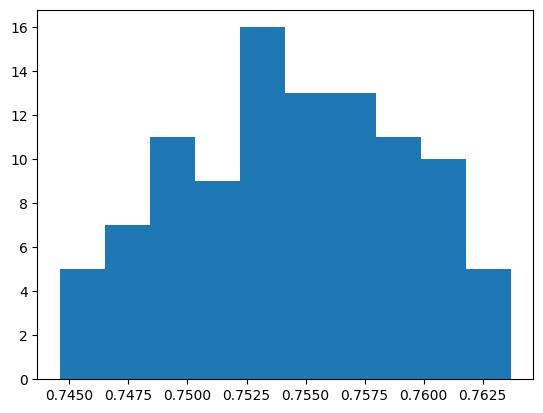

In [ ]:
# Visualizing the distribution of our 100 runs via a Histogram.
plt.hist(results_balanced, bins = 10)
plt.show()

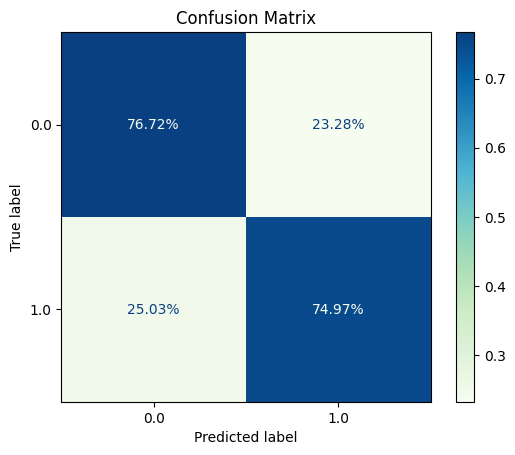

In [ ]:
# Balanced Confusion Matrix

metrics.ConfusionMatrixDisplay.from_estimator(
    gnb,
    X_test,
    y_test,
    normalize = 'true',
    values_format = '.2%',
    cmap = 'GnBu',
)
plt.grid(False)
plt.title('Confusion Matrix')
plt.show()

## Data Visualization/Communication of Results


So to recap:

Our original dataset contained 104 Columns and over 1 million rows before any kind of cleaning and manipulation. After I cleaned the data set I was left with 51 Columns and 180,000 rows. We saw that our dataset was unbalanced to begin with. We used a sampling technique inorder to achieve this. But before we did did different type of visualization to see if there we meet the requirement for a Gaussain Bayes Model (Independence between features/Normal Distribution among Features). Once we meet these standards we built our model and got the results, we did cross validation and displayed a histogram to see the distribution of prediction percents in the real world. We also displayed a confusion matrix for our intial run before cross validation. After this we repeat the same steps but with our balanced dataset to see if there are any difference in our predictions, in this case balancing the dataset gave us less false negatives than before and got a better result for our true posotives with a hit to out true negatives.

##### Dataset Visualizations

In [ ]:
data.shape

(1050000, 104)

In [ ]:
df.shape

(180000, 51)

In [ ]:
target_values = df['target'].value_counts()
target_values

,count
target,
0.0,161960
1.0,18040


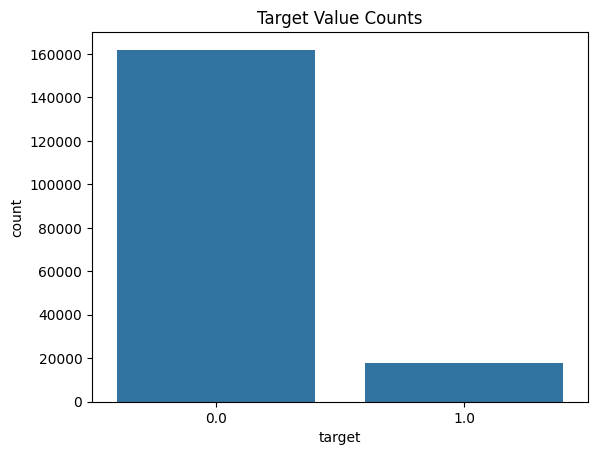

In [ ]:
# Visualizing the target
sns.barplot(target_values)
plt.title('Target Value Counts')
plt.show()

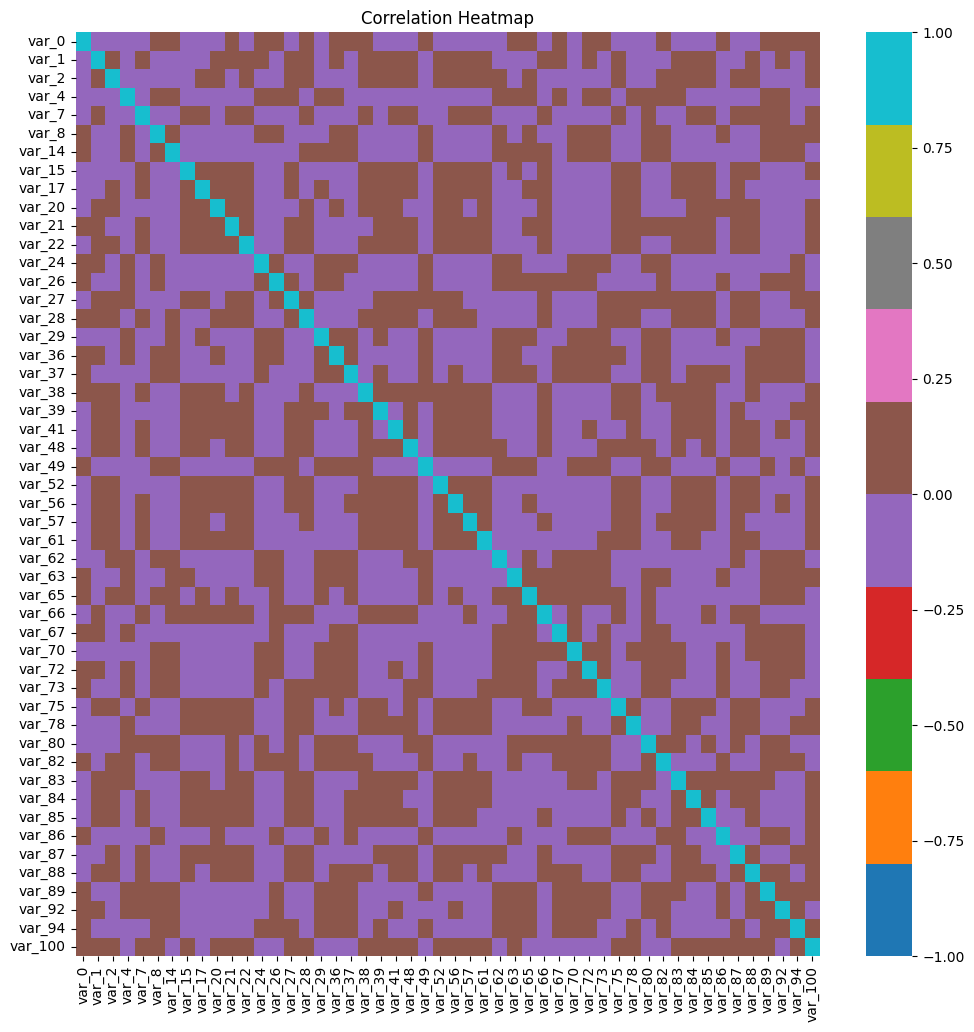

In [ ]:
# Correlation Matrix for unbalanced dataset
plt.figure(figsize=(12,12))
sns.heatmap(correlations, vmin=-1, cmap = 'tab10')
plt.title('Correlation Heatmap')
plt.show()

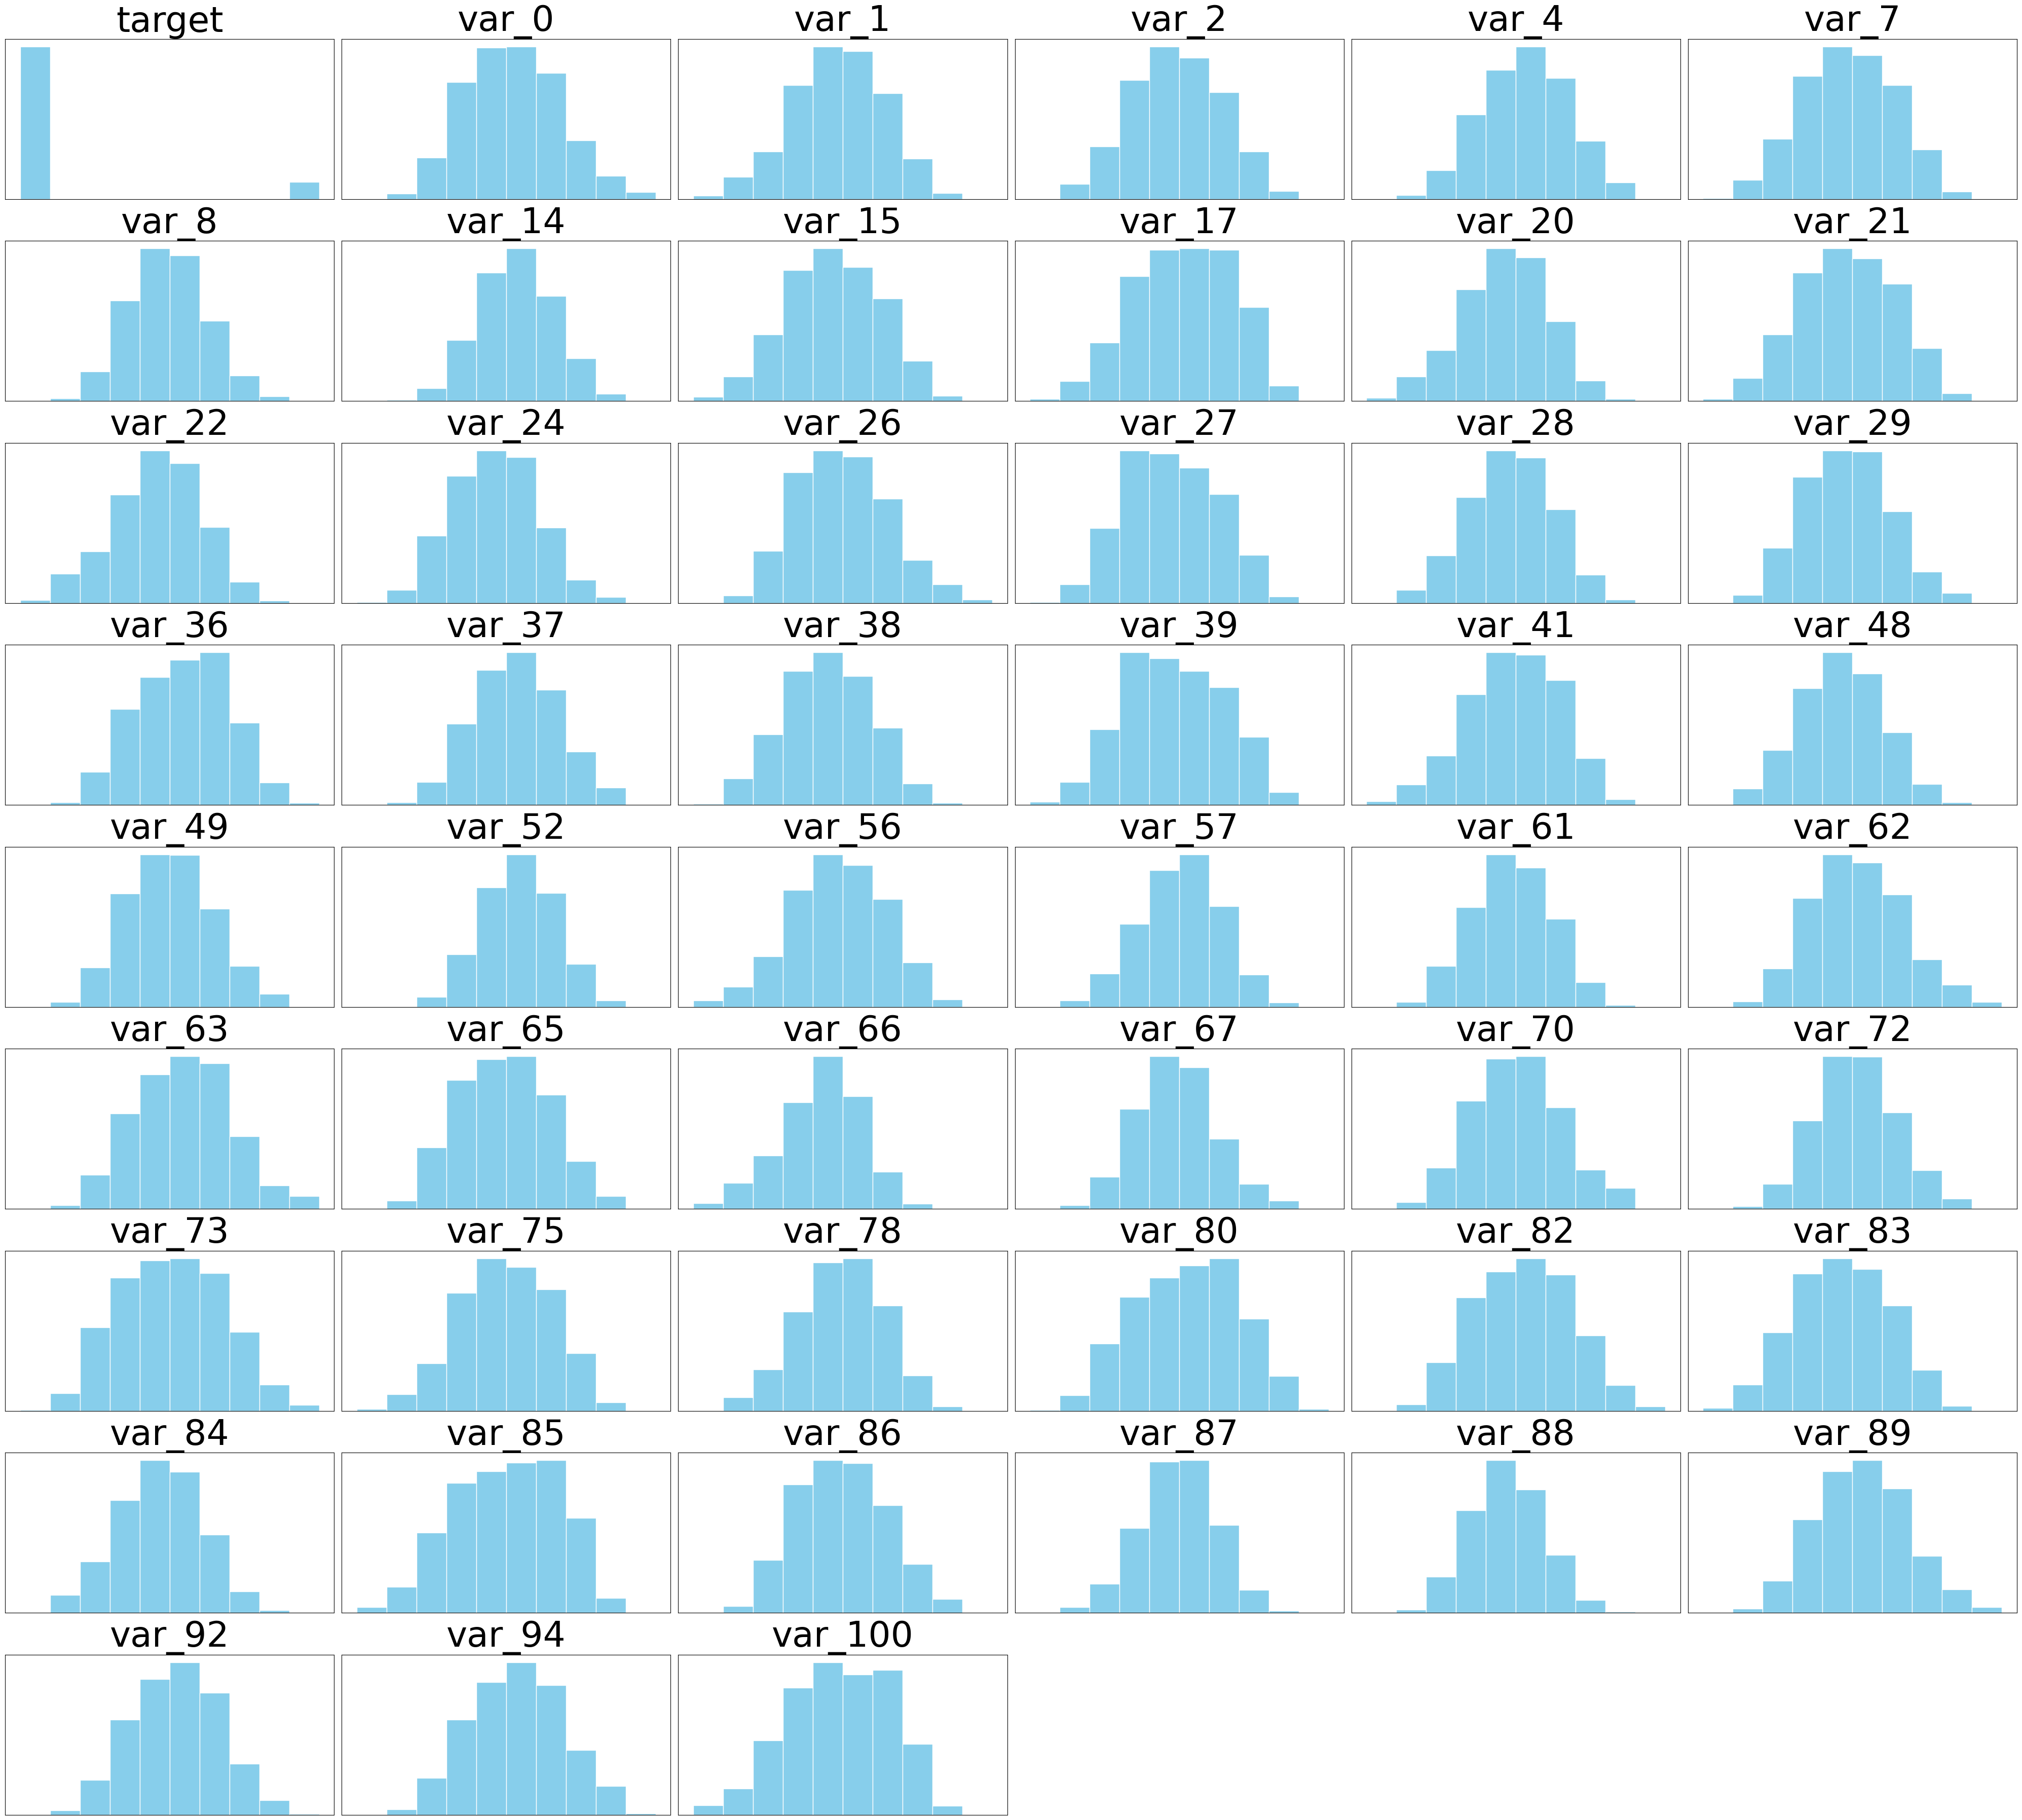

In [ ]:
# Lets take a look to see if our features have a normal distribution
axes = df.hist(figsize=(40, 40), layout=(10,6), bins=10, color='skyblue', edgecolor='white')

# Remove axis ticks and labels for all subplots
for ax in axes.flatten():
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(ax.get_title(), fontsize=50, pad=5)

plt.tight_layout()
plt.show()

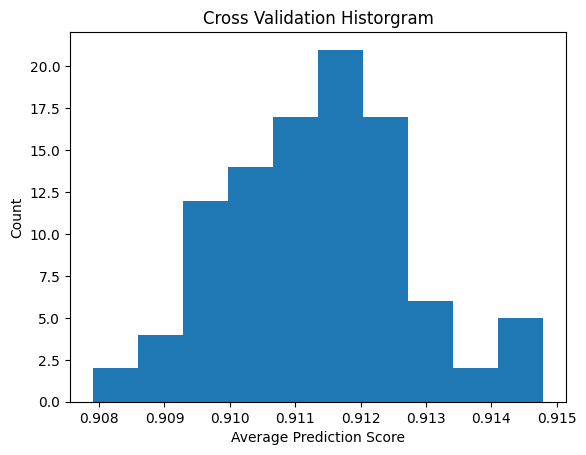

In [ ]:
# Visualizing the distribution of our 100 runs via a Histogram.
plt.hist(results, bins = 10)
plt.title('Cross Validation Historgram')
plt.xlabel('Average Prediction Score')
plt.ylabel('Count')
plt.show()

In [ ]:
# NOTE: To visualize this run up to the unbalanced dataset to visualize correctly!!!

# Unbalanced Confusion Matrix

#metrics.ConfusionMatrixDisplay.from_estimator(
#    gnb,
#    X_test,
#    y_test,
#    normalize = 'true',
#    values_format = '.2%',
#    cmap = 'GnBu',
#)
#plt.grid(False)
#plt.title('Confusion Matrix')
#plt.show()

##### Balanced Dataset Visualizations

In [ ]:
target_values_bal = the_balanced_data['target'].value_counts()
target_values_bal

,count
target,
0.0,18040
1.0,18040


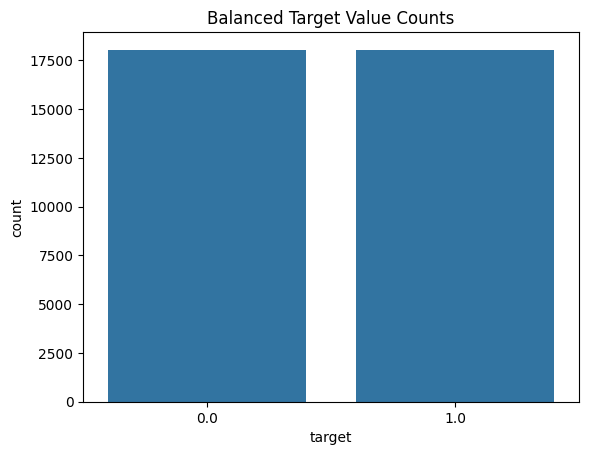

In [ ]:
# Visualizing the balanced target
sns.barplot(target_values_bal)
plt.title('Balanced Target Value Counts')
plt.show()

In [ ]:
# Balanced correlation matrix
correlations_bal = the_balanced_data.corr(numeric_only = True)

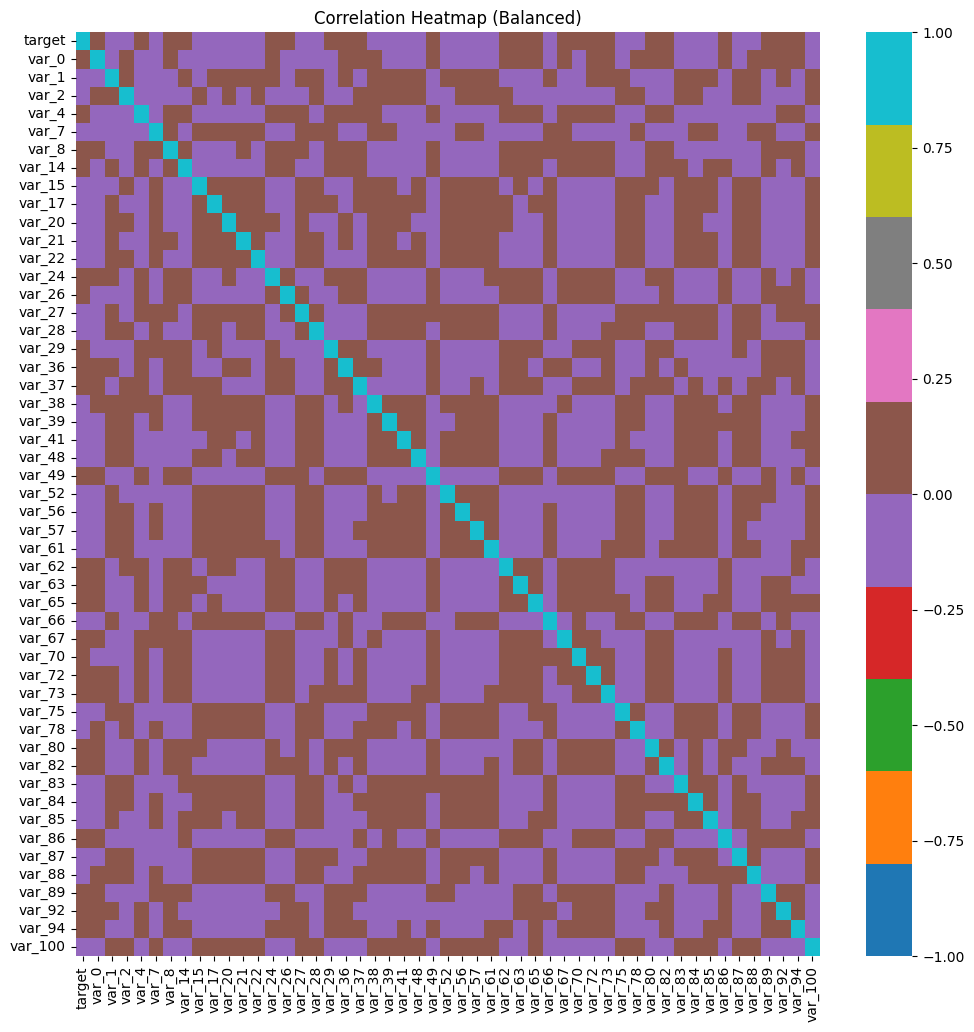

In [ ]:
# Correlation Matrix for balanced dataset
plt.figure(figsize=(12,12))
sns.heatmap(correlations_bal, vmin=-1, cmap = 'tab10')
plt.title('Correlation Heatmap (Balanced)')
plt.show()

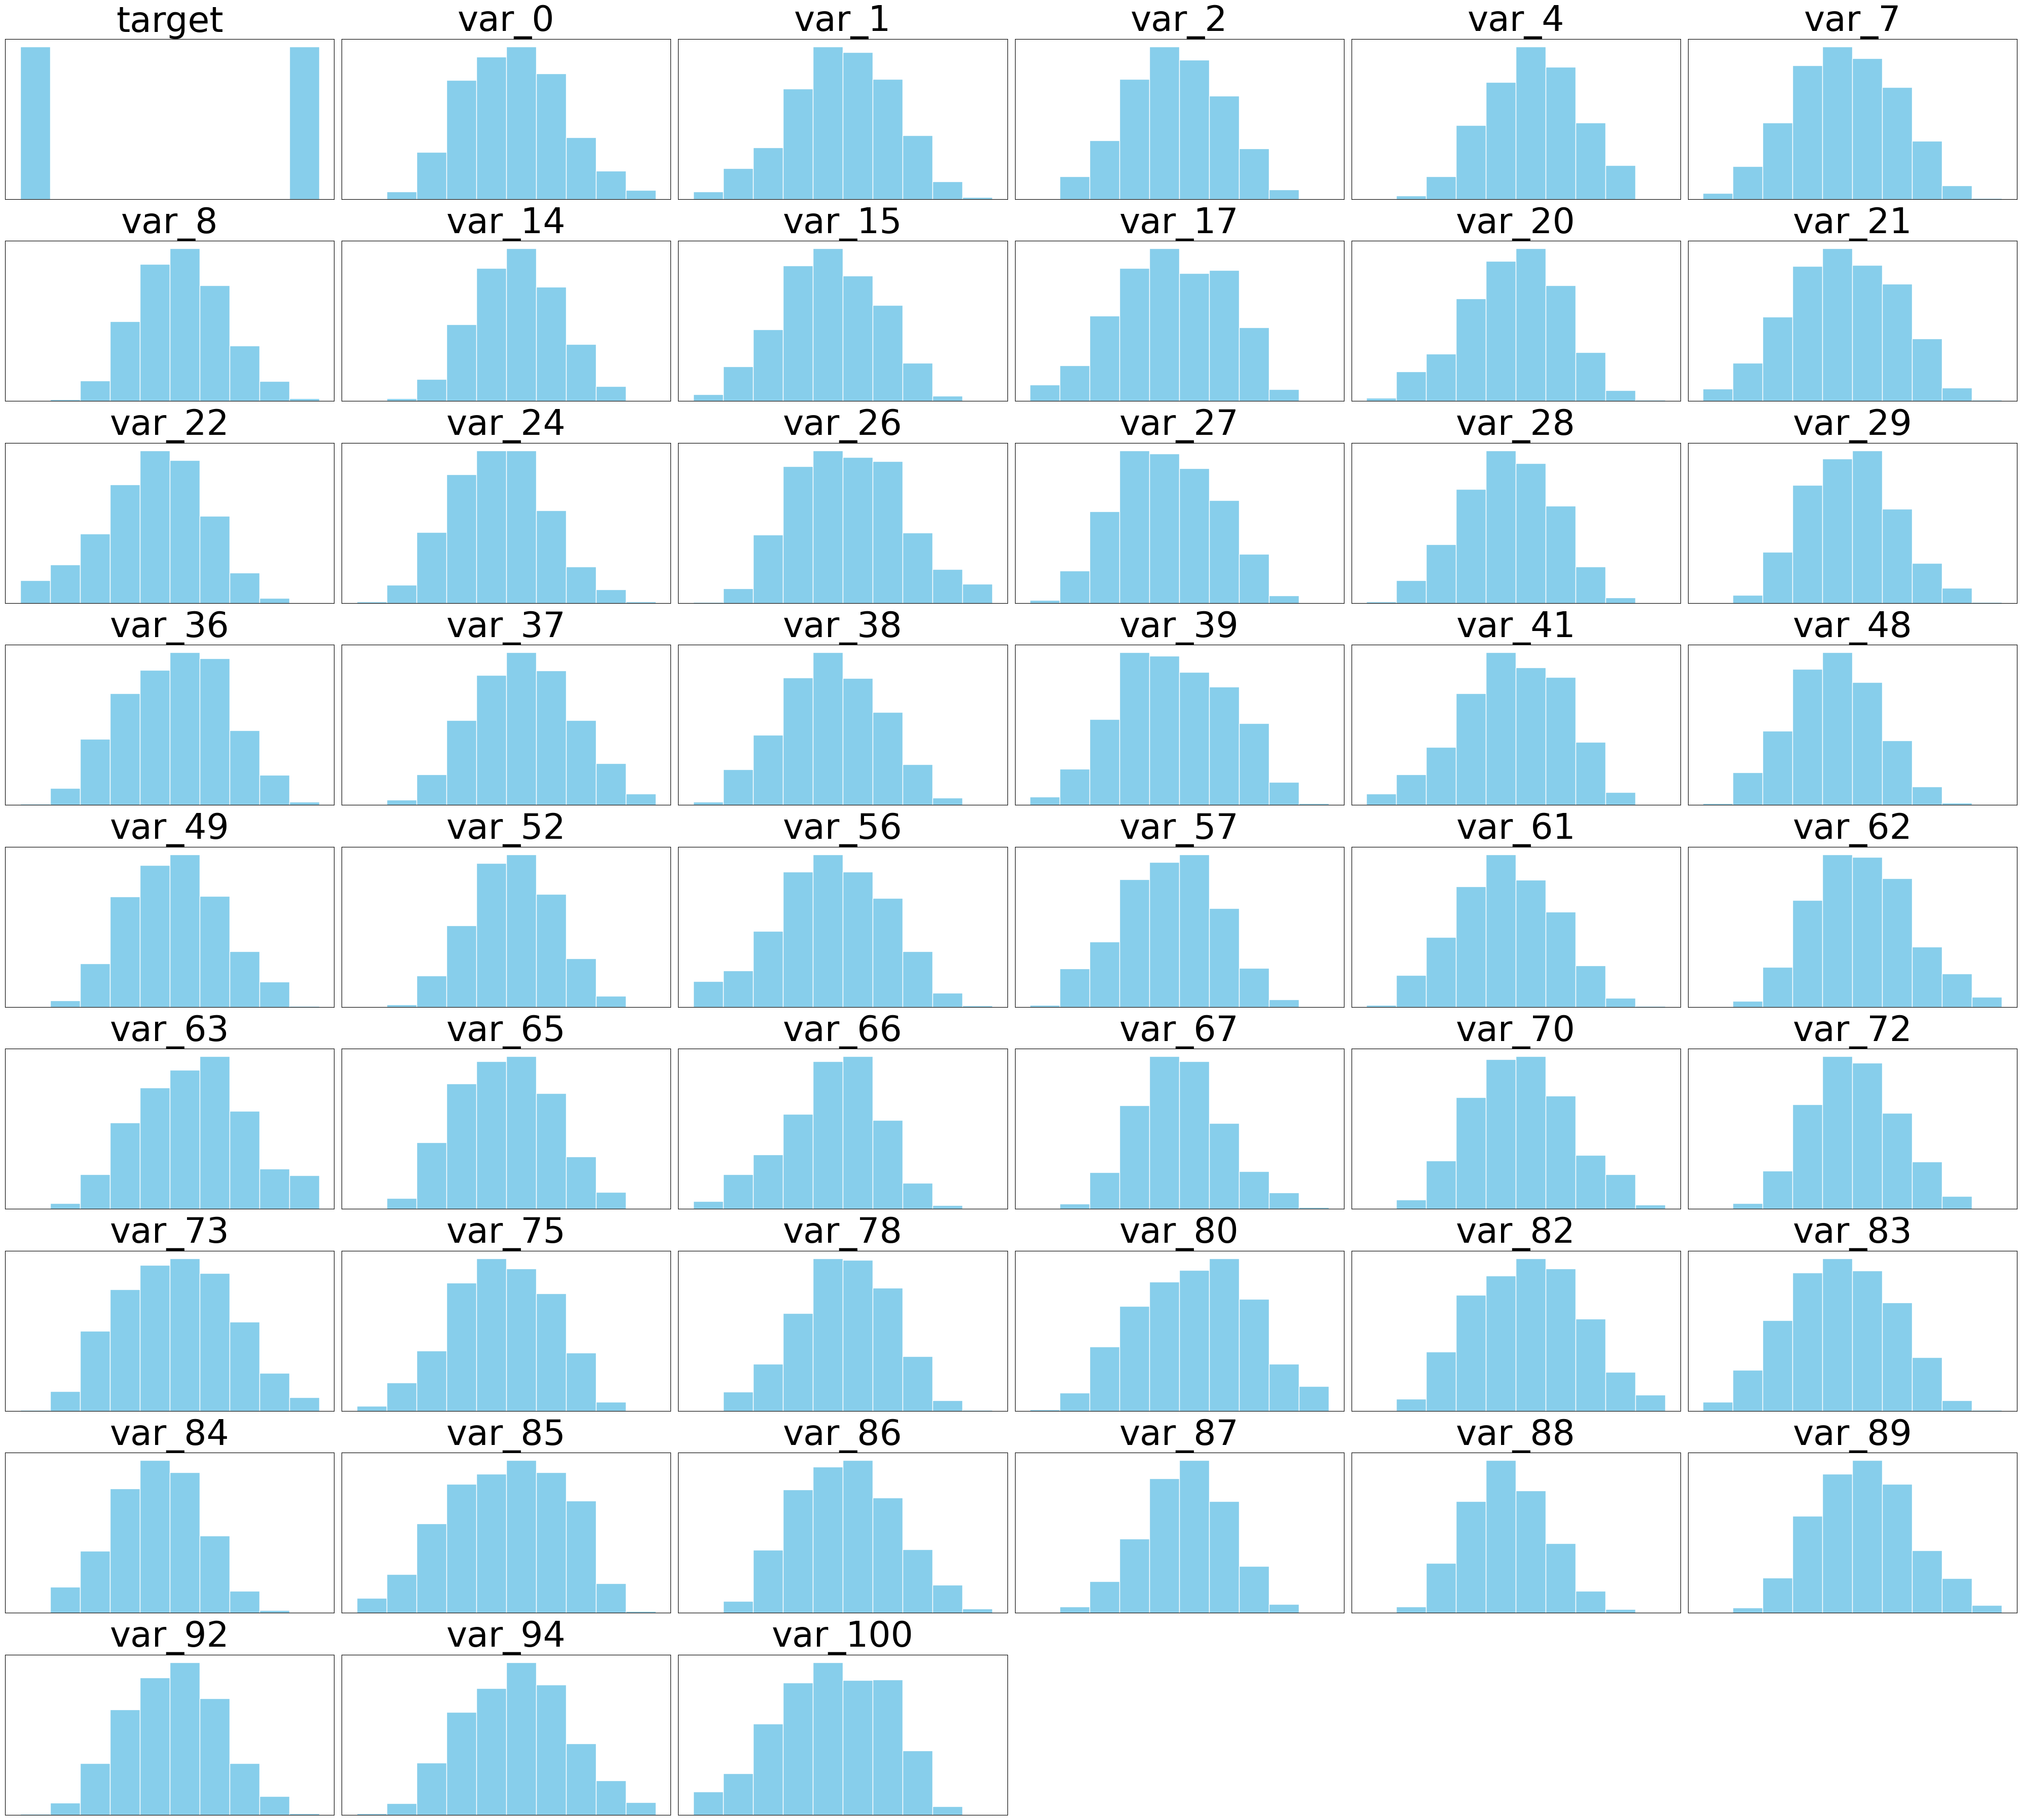

In [ ]:
# Lets take a look to see if our features have a normal distribution (Balanced Dataset)
axes = the_balanced_data.hist(figsize=(40, 40), layout=(10,6), bins=10, color='skyblue', edgecolor='white')

# Remove axis ticks and labels for all subplots
for ax in axes.flatten():
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(ax.get_title(), fontsize=50, pad=5)

plt.tight_layout()
plt.show()

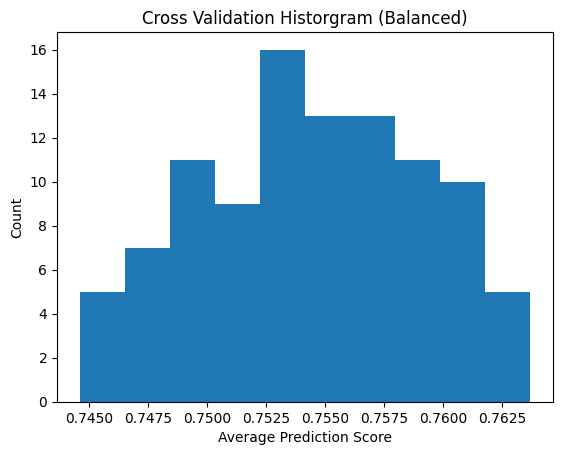

In [ ]:
# Visualizing the distribution of our balanced 100 runs.
plt.hist(results_balanced, bins = 10)
plt.title('Cross Validation Historgram (Balanced)')
plt.xlabel('Average Prediction Score')
plt.ylabel('Count')

plt.show()

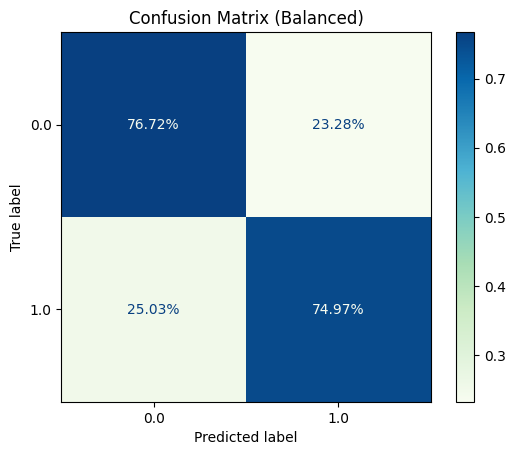

In [ ]:
# Confusion Matrix Plot

metrics.ConfusionMatrixDisplay.from_estimator(
    gnb,
    X_test,
    y_test,
    normalize = 'true',
    values_format = '.2%',
    cmap = 'GnBu',
)
plt.grid(False)
plt.title('Confusion Matrix (Balanced)')
plt.show()

# Project Description

This project looks at transaction data. One very important subset of performing data science on transaction data consists of binary classification problems such as: is a customer satisfied? Will a customer buy this product? Can a customer pay this loan?

In this project, we want to predict whether or not a future customer will make a transaction based on their transaction data.

The data provided has the same structure as real data typically available to solve this problem. The columns of the input variables have been anonymized, so there is no intuition available to help judge which variables might be more important, so all variables need to be considered equally.

The project should be done using the Gaussian Naive Bayes classification techniques as covered in class. In this directory is included a recommended "To Do" list for the project.

The data is available on AWS S3 at https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.big.csv

In [ ]:
# https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.big.csv


# ***Overkill***

Sections I left in for future reference or simply because..

#### ***Section: Problem Definition***

It's important to note, however, that if the data our stakeholder provides does not include historical outcomes we can compare against, then we are dealing with an unsupervised learning problem. In that case, a clustering model would be the most appropriate approach.

There are many ways in which clustering might help uncover similarities or anomalies in the data. These include, but are not limited to:

- Customer profiles: grouping customers based on their average behaviors.

- Insights into patterns: revealing hidden trends in transaction data that can be analyzed further.

- Customer segmentation: identifying high- and low-frequency customers, or groups with unusual behaviors such as high purchase frequency but also high return rates.

True Posotitive: Model predicted 1(positive), the actual label was 1(positive)

True Negative: The model predicted 0(negative) the actual label was 0(negative)

False Positive: The model predicted 1(postitive) the actual label was 0(negative)

False Negative: The model predicted 0(negative) the actual label was 1(Positive)

Precision:“When I predict positive, how often am I right?”
Precision focus (be trustworthy): spam detection, search engines, recommendation systems, legal document retrieval.

Recall:“Of all the real positives, how many did I find?”
Recall focus (catch everything): healthcare, fraud detection, security screening.

In [ ]:
# save the figure
# plt.savefig("Confusion Matrix.png", dpi=300, bbox_inches='tight')